In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats

In [2]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("C:\\Users\\Ju\\Downloads\\titanic\\train.csv")

# Print the DataFrame
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
#Première description du jeu de données

In [ ]:
#On regarde les 5 premières lignes du jeu de données pour s'y familiariser.

df.head()

In [ ]:
#On crée une table de statistiques descriptives pour se familiariser avec les variables numériques

df.describe().T

In [ ]:
#On s'intéresse aux valeurs manquantes. 
#On remarque que la variable cabin n'a qu'environ 15% de valeurs non nulles.
#La variable age a également un nombre significatif de valeurs nulles.


df.isnull().sum()

In [ ]:
#Premier preprocessing : 

In [ ]:
#Il n'y a que deux lignes ou l'information d'embarquement est manquante. Nous les supprimons.


df = df[df['Embarked'].notnull()]

In [ ]:
#On va imputer les valeurs manquantes des variables numériques par leur valeur moyenne.
def impute_data(df):
  # Create imputers for different strategies
  imputer_num = SimpleImputer(strategy="mean") # Impute numerical features with mean

    #NB: Pour cat, vu que 2/3 de cabin manquent vaut mieux faire dropna?
    #NB2: Pour num, y'a que age donc...
  # Separate numerical and categorical columns
  num_cols = df.select_dtypes(include=[np.number])

  # Impute numerical and categorical features separately
  df[num_cols.columns] = imputer_num.fit_transform(num_cols)

  return df

In [ ]:
data_imputed = impute_data(df.copy())

In [ ]:
#df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
#df = df.drop(columns=['Embarked', 'Cabin'])

In [ ]:
#Ensuite, on cherche à numériser des variables catégorielles

In [ ]:
#Imprimons le nom des colonnes contenant des variables catégorielles.


categorical_cols = data_imputed.select_dtypes(include=[object])
print("Columns with object dtype (potentially categorical):")
print(categorical_cols.columns.tolist())

In [ ]:
#Les étapes de preprocessing suivants sont montrées ici, mais le code n'interviendra qu'ultérieurement.
#En effet, il est plus pratique de visualiser certaines données catégorielles sans les numériser pour l'instant. La numérisation jouera un rôle dans la la modélisation

In [ ]:
#data_imputed["Sex"] = data_imputed["Sex"].apply(lambda x: 0 if x == "male" else 1)

In [ ]:
#print(data_imputed["Sex"])  # Affichons la variable transformée.

In [ ]:
#La variable embarked ne serait pas utilisable dans la modélisation ultérieure, du fait de sa nature (catégorielle). Ainsi, on la numérise par label encoding.

#le = LabelEncoder()
# On encode la colonne 'embarked' (on transforme 'cherbourg', 'southampton' et 'queensland' en 0,1 et 2)
#data_imputed["Embarked"] = le.fit_transform(data_imputed["Embarked"])

#print(data_imputed["Embarked"])  #On imprime la colonne transformée

In [ ]:
#On a vu ci-dessus que plus de la moitié des observations de cabin sont manquantes.
#Nous considérons que, de ce fait, il vaut mieux ne pas utiliser cette variable. Nous supprimons donc la colonne 'Cabin'.
df_modified = data_imputed.drop("Cabin", axis=1)  

In [ ]:
#On peut passer à l'étape suivante

#PARTIE 2/ ANALYSE STATISTIQUE

In [10]:
#Pour faire le lien entre la Partie 1 et 2
data = df

In [11]:
# Ici, nous calculons les statistiques descriptives pour toutes les valeurs numériques

numerical_cols = data.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
  if col != 'PassengerId': #On exclut le numéro de passager
    print(f"\n**Descriptive statistics of {col}**")
    print(data[col].describe())  # Affichons les résultats


**Descriptive statistics of Survived**
count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

**Descriptive statistics of Pclass**
count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

**Descriptive statistics of Age**
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

**Descriptive statistics of SibSp**
count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

**Descriptive statistics of Parch**
count    891.000000
mean       0.381594
std        0.806057

C:\Users\Ju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

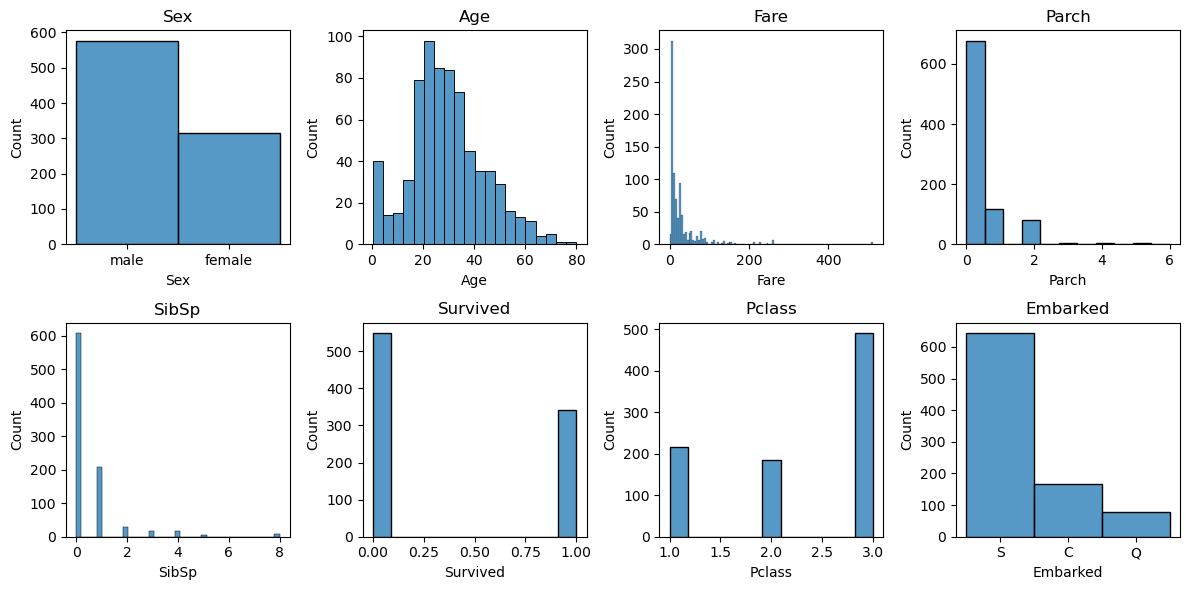

In [12]:
#Représentons graphiquement la distribution des variables.

features = ['Sex', 'Age', 'Fare', 'Parch', 'SibSp', 'Survived', 'Pclass', 'Embarked']

# On crée un histogramme pour chaque variable

fig, axes = plt.subplots(2, 4, figsize=(12, 6))

for i, feature in enumerate(features):
    row, col = i // 4, i % 4
    sns.histplot(data[feature], ax=axes[row, col])
    axes[row, col].set_title(feature)

# Pour que les graphiques ne s'emboitent pas
plt.tight_layout()

# Affichons les grpahiques
plt.show()

In [ ]:
#On observe qu'il y a le double de passagers masculins que de passagers féminins.

#La distribution des passagers selon l'age nous semble approximativement normale.

#La distribution des prix des billets nous semble lognormale. En effet il y a une forte skewness à gauche.

#Les variables Parch et SibSp ont toutes les deux un mode à 0 et, environ 1/4 des observations au dessus de 0.

#Environ 60% pourcent des passagers n'ont pas survécu au naufrage.

#La distribution des classes est proche de: 50% des passagers en classe 3 et 25% pour chacune des classes 1 et 2.

#Environ 2/3 des passagers ont embarqué à Southampton, 20% à Cherbourg et le reste à Queensland.

In [ ]:

# Pour la visualisation de la survie des passagers, selon différentes variables.
categorical_features = ['Parch', 'SibSp', 'Embarked', 'Sex','Pclass']

# On crée un graphique pour la survie, selon chacune des variables ci-dessus
for feature in categorical_features:
    sns.barplot(x=feature, y='Survived', data=data)
    plt.title(f"Probabilités de survie selon {feature}")
    plt.xlabel(feature)
    plt.ylabel("Taux de survie")
    plt.show()

# Pour une représentation numérique des graphiques 
for feature in categorical_features:
    print(f"Probabilités de survie selon {feature}:")
    print(data.groupby(feature)['Survived'].mean())
    print("\n")

In [ ]:
#Le taux de survie selon parch est moyen pour une valeur de 0, inférieur à la moyenne pour pour une Valeur de 5. Les autres valeurs on une probabilité de survie  de 10 à 20% au dessus de la moyenne.
#Il semble donc que le fait d'appartenir à une famille de taille moyenne augmente les probabilités de survie, vis-à-vis de ménages sans enfants et de grandes familles.

#La variable SibSp semble corroborer ceci.

#En ce qui concerne le port d'embarquement, il sembe que les passagers ayant embarqué à Cherbourg ont une plus forte probabilité de survie que les autres passagers.

#Le fait d'être de sexe féminin confère un significatif avantage en termes de survie. En effet, près de 80% des passagers féminins ont survécu au naufrage, vs. moins de 20% des passagers masculins.

#La probabilité de survie des passagers de classe 3 est en dessous de la moyennene. Les passagers de classe 2 ont près de deux fois plus de chance de survivre, et les passagers de classe 1 ont plus de 60% de chance de survivre.

In [ ]:
#Les variables 'Fare' et 'Age' sont difficilement représentables en tant que telles.
#Il va nous falloir les condenser en classes

In [ ]:
#Ici, nous représentons la survie des passagers, selon différentes classes de prix de ticket

# On segmente les prix des tickets (une variable continue) en seulement 5 classes.
def fare_band(fare):
    fare_bands = [0, 50, 100, 200, 1000]
    for i in range(len(fare_bands) - 1):
        if fare_bands[i] <= fare < fare_bands[i + 1]:
            return f"{fare_bands[i]} ~ {fare_bands[i + 1]}"
    return f"{fare_bands[-1]}+"

# Créons une nouvelle colonne pour les classes
data['fare_band'] = data['Fare'].apply(fare_band)

# Calculons la chance de survie, par classe
titanic_fare = data[['fare_band', 'Survived']].groupby('fare_band')['Survived'].value_counts().sort_index().unstack().fillna(0)
titanic_fare['Survival rate'] = titanic_fare[1] / (titanic_fare[0] + titanic_fare[1]) * 100


# Définissons les couleurs
color_map = ['#d4dddd' for _ in range(5)]
color_map[0] = color_map[4] = '#244747'

# Créons le graphique
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

ax.bar(
    titanic_fare['Survival rate'].index,
    titanic_fare['Survival rate'],
    color=color_map,
    width=0.55,
    edgecolor='black',
    linewidth=0.7
)

for s in ["top", "right", "left"]:
    ax.spines[s].set_visible(False)

mean = data['Survived'].mean() * 100
ax.axhline(mean, color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(
    f"Moyenne : {mean :.4}%",
    xy=('200 ~ 1000', mean + 4),
    va='center',
    ha='center',
    color='#4a4a4a',
    bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0)
)

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)

# Annotons le graphique
for i in titanic_fare['Survival rate'].index:
    ax.annotate(
        f"{titanic_fare['Survival rate'][i]:.02f}%",
        xy=(i, titanic_fare['Survival rate'][i] + 2.3),
        va='center',
        ha='center',
        fontweight='light',
        color='#4a4a4a'
    )

fig.text(0.06, 1, 'Probabilités de survie selon le prix du billet', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.06, 0.96, "Il semble qu'il y ait un lien important entre les chances de survie et le prix du billet", fontsize=12, fontweight='light', fontfamily='serif')


plt.tight_layout()
plt.show()


In [ ]:

def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

data['age_band'] = data['Age'].apply(age_band)
titanic_age = data[['age_band', 'Survived']].groupby('age_band')['Survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

color_map = ['#d4dddd' for _ in range(9)]
color_map[0] = color_map[8] = '#244747' # color highlight

ax.bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], 
       color=color_map, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)



for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)


# Annotons le graphique
for i in titanic_age['Survival rate'].index:
    ax.annotate(f"{titanic_age['Survival rate'][i]:.02f}%", 
                   xy=(i, titanic_age['Survival rate'][i] + 2.3),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')


mean = data['Survived'].mean() *100
ax.axhline(mean ,color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"Moyenne : {mean :.4}%", 
            xy=('70 ~ 80', mean + 4),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))
    

fig.text(0.06, 1, "Probabilités de survie selon lâge", fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.06, 0.96, 'On voit que le taux de survie est nettement plus élevé chez les plus jeunes et les plus agés.', fontsize=12, fontweight='light', fontfamily='serif')


plt.tight_layout()
plt.show()

In [ ]:

# Sur ce scatterplot on représente la distribution des prix de tickets selon l'age des passagers

plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Fare'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare Distribution')
plt.grid(True)
plt.show()


In [ ]:
#Ensuite, on va chercher à examiner la relation entre la survie des passagers, et plusieurs variables en même temps.

In [ ]:
#Ici, nous voyons la survie selon le sexe ainsi que la classe de voyage des passagers

#Premièrement, on observe que, quelle que soit la classe, les passagers de sexe féminin ont des chances de survie nettement meilleures.

#Ensuite, on constate que les chances de survie des femmes sont à peu près équivalentes pour les classes 1 et 2, mais sont quasiment divisées par 2  pour la classe 3.

#De plus, les chances de survie des hommes voyageant en classe 1 et la survie des femmes voyageant en classe 3 sont à peu près équivalents. Néanmoins, ces chances de survie sont divsées par 2 pour les classes 2 et 3.

ax = sns.catplot(
        x='Pclass',
        y='Survived',
        hue='Sex',
        kind='bar',
        data=data,
    )

In [ ]:
#Ici, nous voyons les probabilités de survie selon la classe de passager et le port d'embarquement.

#Comme prévu, ces chances sont décroissantes avec la classe (1 étant la classe prémium et 3 la classe la plus modeste)

#On remarque également qu'en moyenne, les passagers embarqués à Southhampton ont de nettement plus faibles probabilités de survie que les passagers embarqués dans les autres ports.

with sns.plotting_context('notebook',font_scale=1):

    ax = sns.catplot(
        x='Pclass',
        y='Survived',
        hue='Embarked',
        kind='bar',
        data=data,
    )

In [ ]:
with sns.plotting_context('notebook',font_scale=1.2):

    ax = sns.catplot(
        x='Survived',
        y='Age',
        hue='Sex',
        col='Pclass',
        data=data,
        orient='v',
        kind='boxen',
    )

In [ ]:
#Ici, on utilise le code de la partie preprocessing:
data["Sex"] = data["Sex"].apply(lambda x: 0 if x == "male" else 1)


In [ ]:
#Regardons la correlation des variables entre elles

# Selectionnons les variables d'intérêt
numerical_features = ['Sex','Age', 'Fare', 'Parch', 'SibSp','Survived','Pclass']

# Créons la matrice des corrélations
correlation = data[numerical_features].corr(method='spearman') 
print(correlation)

# Créons le corrélogramme
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Ici, nous examinons la corrélation des différentes variables, avec la variable de survie

corr_matrices = {}

# Calculons les corrélations avec 'Survived'
for feature in numerical_features:
    corr_matrix = data[[feature, 'Survived']].corr(method='spearman')  # Spearman for mixed data types
    corr_matrices[feature] = corr_matrix.iloc[1, 0]  # Extract correlation value with 'Survived'

# Affichons les résultats
print("Correlations with Survival:")
for feature, correlation in corr_matrices.items():
    print(f"{feature}: {correlation:.2f}")

#NB:Y'a une erreur avec le Nan de sex

In [ ]:
#Ici, nous effectuons des t-test, afin d'examiner la significativité de la relation entre chaque variable numérique et 'Survived' 

#On extrait les colonnes numériques
numeric_cols = data.select_dtypes(include=[np.number])  

# Boucle sur chaque colonne numérique (à l'exclusion de la variable cible)
for col in numeric_cols.columns:
    if col != 'Survived':  # Il faut qu'on spécifie qu'on ne teste pas la variable expliquée.
        survived_data = data[data['Survived'] == 1][col]
        not_survived_data = data[data['Survived'] == 0][col]

        # Effectuons les test
        t_stat, p_value = stats.ttest_ind(survived_data, not_survived_data)

        # Print results
        print(f"T-statistic for '{col}': {t_stat}")
        print(f"p-value for '{col}': {p_value}")
        print("---------------------")


In [ ]:
#Nous pouvons passer à l'étape suivante

#PARTIE 3/ REGRESSION LOGISTIQUE

In [14]:
#Pour faire le lien entre la partie 2 et 3
df=data

In [15]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [16]:
df = df.drop(columns=['Embarked', 'Cabin'])

In [17]:
#Important: normalement cette étape devrait être dans la partie 1
df["Sex"] = df["Sex"].apply(lambda x: 0 if x == "male" else 1)

In [18]:
# On définit les variables explicatives et les variables expliquées du modèle
features=['Age', 'Fare','SibSp']
X = df[features]  # On prend, de manière arbitraire, les variables 'Age', 'Fare' et 'SibSp' pour une première modélisation
y = df['Survived']

# On sépare les données, pour créer et tester le modèle (on ne peut pas faire les deux sur les mêmes données, car les estimateurs n'auraient pas de validité externe)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Spécifions le modèle
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Créons le vecteur des valeurs prédites
y_pred = model.predict(X_test)

# Calculons la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6815642458100558


In [ ]:
#Dans ce premier modèle, nous avons spécifié les variables explicatives de manière arbitraire.
#Maintenant, nous allons déterminer les variables explicatives selon un critère déterminé: la corrélation avec la variable expliquée.
#Nous allons reprendre le vecteur de corrélation vu précédement, et en extraire les variables le plus liées à la survie des passagers.
#Au final, on intègre dans notre régression les variables à coefficient de correlation avec 'Survived' >=0.3

In [ ]:
#Regarder la correlation des variables avec 'Survived'

numerical_features = ['Sex','Age', 'Fare', 'Parch', 'SibSp','Pclass']

corr_matrices = {}

# Calculons le vecteur de corrélation
for feature in numerical_features:
    corr_matrix = df[[feature, 'Survived']].corr(method='spearman')  # Spearman for mixed data types
    corr_matrices[feature] = corr_matrix.iloc[1, 0]  # Extract correlation value with 'Survived'

# Affichons le vecteur de corrélation
print("Correlations avec 'Survived':")
for feature, correlation in corr_matrices.items():
    print(f"{feature}: {correlation:.2f}")


In [ ]:
# On extrait les variables les plus correllées
high_corr_features = []
for feature, correlation in corr_matrices.items():
    if abs(correlation) > 0.3:
        high_corr_features.append(feature)

# On affiche ces variables (si des variables à rho >= 0.3 existent)
if high_corr_features:
    print("Variables à coeff. de corrélation > 0.3 (en VA):")
    for feature in high_corr_features:
        print(f"- {feature}")
else:
    print("Il n'y a pas de variables à coeff. de corrélation > 0.3 (en VA) ")

In [ ]:
# On spécifie maintenant une régression logistique avec nos nouvelles variables.

#On affecte les variables à X
X = df[high_corr_features]
y = df['Survived']

# On sépare les données, pour créer et tester le modèle (on ne peut pas faire les deux sur les mêmes données, car les estimateurs n'auraient pas de validité externe)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Spécifions le modèle
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Créons le vecteur des valeurs prédites
y_pred = model.predict(X_test)

# Calculons la précision du modèle.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
#On observe qu'en chosissant les variables explicatives selon le critère de corrélation, on passe d'un pouvoir prédictif de 0.68 à 0.78.

In [ ]:
#Maintenant, utilisons un autre critère de choix.
#Ici, nous intégrons les variables dans le modèle selon que leur association avec la survie est statistiquement significative au seuil de 5%.

In [ ]:

# On extrait les variables numériques
numeric_cols = df.select_dtypes(include=[np.number])  

# Ce vecteur vide contiendra les variables significatives après
significant_features = []

# Pour tester les différents variables on utilise une boucle
for col in numeric_cols.columns:
    if col != 'Survived':  # On ne teste pas la variable expliquée
        survived_data = df[df['Survived'] == 1][col]
        not_survived_data = df[df['Survived'] == 0][col]

        # Faisons les t-test
        t_stat, p_value = stats.ttest_ind(survived_data, not_survived_data)

        # On affiche les résultats des t-test
        print(f"T-statistic for '{col}': {t_stat:.4f}")   
        print(f"p-value for '{col}': {p_value:.4f}")      
        print("-------------------------")

        # On garde les variables selon le seuil de significativité choisi (5%)
        if p_value < 0.05:
            significant_features.append(col)

# On affiche les variables statistiquement significatives 
print("Variables à p-value < 0.05:")
print(*significant_features, sep='\n')  # Affichons chaque variable l'une après l'autre

In [ ]:
# On spécifie maintenant une régression logistique avec nos nouvelles variables.

#On affecte les variables significatives à X
X = df[significant_features]
y = df['Survived']

# On sépare les données, pour créer et tester le modèle (on ne peut pas faire les deux sur les mêmes données, car les estimateurs n'auraient pas de validité externe)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Spécifions le modèle
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Créons le vecteur des valeurs prédites
y_pred = model.predict(X_test)

# Calculons la précision du modèle.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
#On observe que, bien qu'on retienne plus de variables que selon le critère de corrélation, le pouvoir prédictif de notre modèle baisse.